In [3]:
!pip -q install -U diffusers transformers accelerate scipy safetensors xformers

# 학습 완료된 모델 인퍼런스 노트북


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler

## 모델 다운로드


In [3]:
s3_model_artifact = 's3://sagemaker-us-east-1-981794133797/dreambooth-style-training/output/dreambooth-ntrac-lykgnod-2023-06-24-04-22-10-910/output/model.tar.gz'

In [4]:
!mkdir -p models
!aws s3 cp $s3_model_artifact models/

download: s3://sagemaker-us-east-1-981794133797/dreambooth-style-training/output/dreambooth-ntrac-lykgnod-2023-06-24-04-22-10-910/output/model.tar.gz to models/model.tar.gz


In [5]:
!tar zxvf models/model.tar.gz -C models/

vae/
vae/diffusion_pytorch_model.bin
vae/config.json
scheduler/
scheduler/scheduler_config.json
feature_extractor/
feature_extractor/preprocessor_config.json
model_index.json
unet/
unet/diffusion_pytorch_model.bin
unet/config.json
tokenizer/
tokenizer/tokenizer_config.json
tokenizer/merges.txt
tokenizer/vocab.json
tokenizer/special_tokens_map.json
text_encoder/
text_encoder/config.json
text_encoder/pytorch_model.bin


## 모델 로드


In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    './models',
    torch_dtype=torch.float16,
)
pipe.to("cuda")
pipe.enable_sequential_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)

In [6]:
!nvidia-smi

Sat Jun 24 06:04:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10G         Off  | 00000000:00:1E.0 Off |                    0 |
|  0%   33C    P0    60W / 300W |   3226MiB / 22731MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 테스트


In [7]:
def prompt_to_image(
    prompt: str,
    negative_prompt: str = None,
    seed: int = 0,
    guidance_scale: float = 7.5*2,
    num_inference_steps: int = 30,
):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=512,
        height=512,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=generator,
    ).images[0]
    return image

In [8]:
def display_img_and_prompt(img, prmpt):
    """Display hallucinated image."""
    rows = 2
    cols = 2
    plt.figure(figsize=(4, 4))
    plt.imshow(np.array(img))
    plt.axis("off")
    plt.title(prmpt)
    plt.show()

In [9]:
negative_prompt = 'pattern, cropped, shadow, out of frame, duplicate, watermark, signature, text, ugly, sketch, deformed, mutated, blurry'

  0%|          | 0/30 [00:00<?, ?it/s]

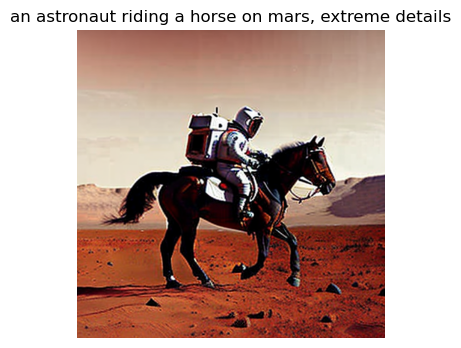

In [10]:
prompt = "an astronaut riding a horse on mars, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=3)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

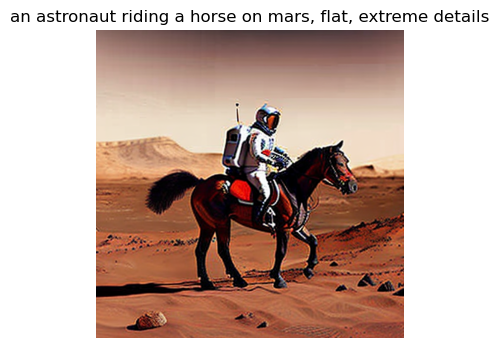

In [11]:
prompt = f"an astronaut riding a horse on mars, flat, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=3)
display_img_and_prompt(image, prompt)

In [14]:
token = ''.join(reversed('DONGKYL_CARTN'))

  0%|          | 0/30 [00:00<?, ?it/s]

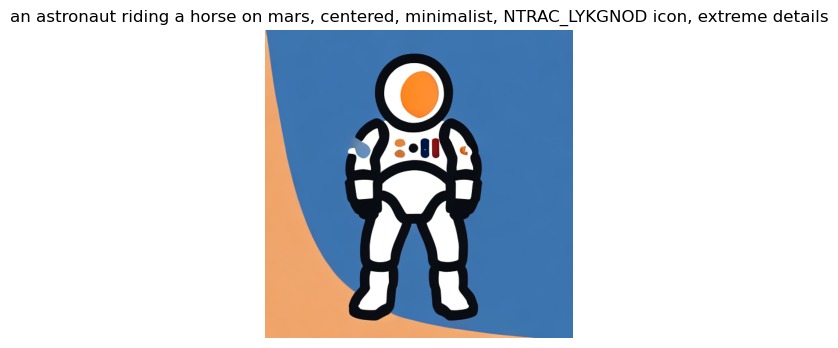

In [45]:
prompt = f"an astronaut riding a horse on mars, centered, minimalist, {token} style, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=2)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

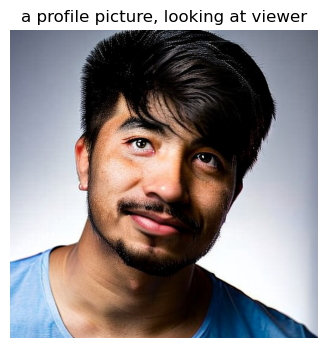

In [26]:
additional_neg_prompt = ', glasses'
prompt = f"a profile picture, looking at viewer"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt + additional_neg_prompt, seed=3)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

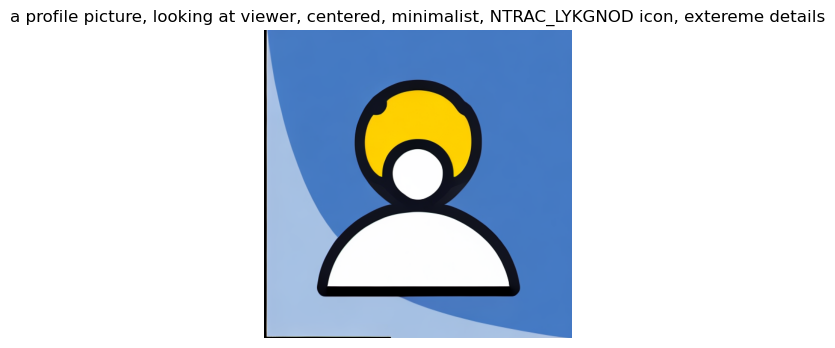

In [29]:
prompt = f"a profile picture, looking at viewer, centered, minimalist, {token} style, extereme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=2)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

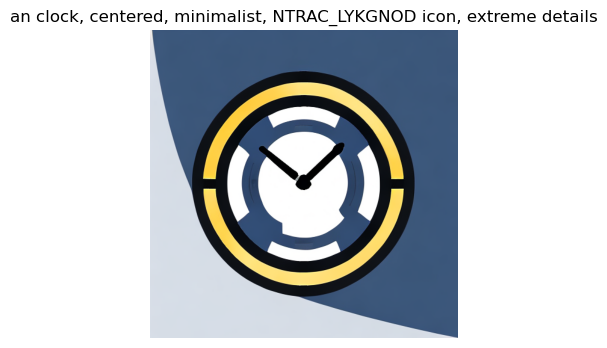

In [30]:
prompt = f"an clock, centered, minimalist, {token} style, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=5)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

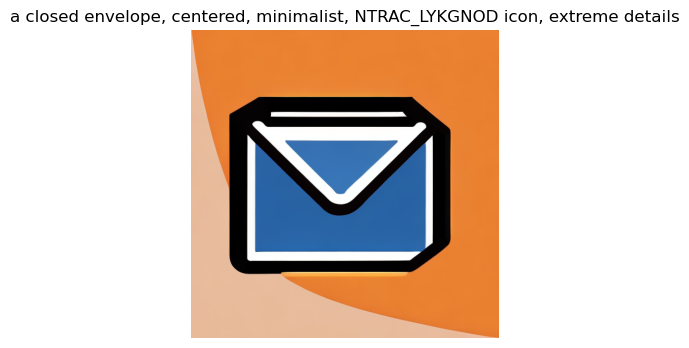

In [35]:
prompt = f"a closed envelope, centered, minimalist, {token} style, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=2)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

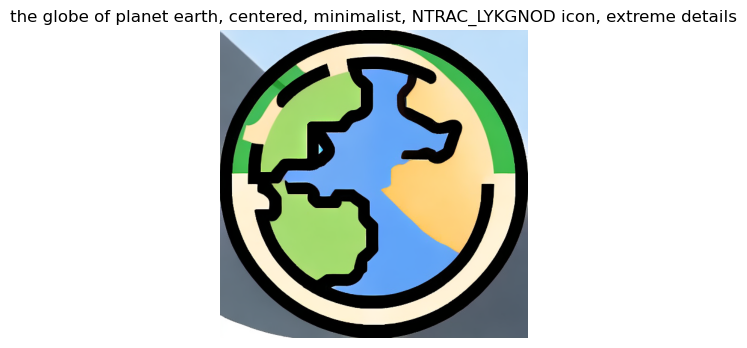

In [43]:
prompt = f"the globe of planet earth, centered, minimalist, {token} style, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=4)
display_img_and_prompt(image, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

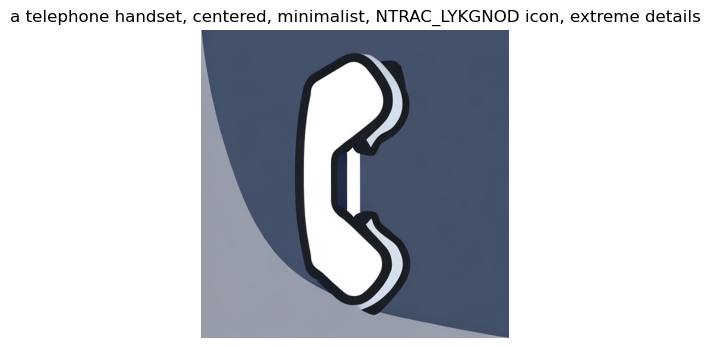

In [44]:
prompt = f"a telephone handset, centered, minimalist, {token} style, extreme details"
image = prompt_to_image(prompt=prompt, negative_prompt=negative_prompt, seed=2)
display_img_and_prompt(image, prompt)